# Notebook to test `MyLinearRegression` class and its methods
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In [1]:
from MyLinearRegression import MyLinearRegression as mlr
import numpy as np
import matplotlib.pyplot as plt

### Generate random data with noise

In [2]:
num_samples=40
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+10*np.random.randn(num_samples)

### Instantiate a model object (we imported the class as `mlr`)

In [3]:
model = mlr()

### What if we just print the model?
The `__repr__` method should kick in

In [4]:
model

I am a Linear Regression model!

### Ingest the data by invoking the `ingest_data` method

In [5]:
model.ingest_data(X,y)

### In theory, you can reach inside the model and look at the class variables like `features_`.
This is, however, not recommended. The idea of Object-oriented programming is to separate core functions from the user API. Only use the high-level linear-regression related API functions like `fit`, `predict`, or `histogram_resid`.

In [6]:
model.features_[:10]

array([[5.14756341, 4.4695061 , 3.47104456, 9.40286684, 4.41800273],
       [1.07539458, 4.21655694, 1.44855154, 8.49167788, 1.71239689],
       [4.11686871, 9.20815826, 8.91247482, 1.76354031, 1.50853858],
       [3.27190154, 3.20772777, 0.93022954, 0.84110261, 9.29072503],
       [7.58228104, 9.91076151, 6.94014864, 1.11787281, 4.9943318 ],
       [8.59882292, 8.85728508, 7.40445246, 7.36960121, 0.83286588],
       [9.2730149 , 2.18713816, 9.18467117, 0.40380755, 7.00943527],
       [5.39352199, 9.65383703, 2.06523596, 2.43322619, 9.34616696],
       [3.85012151, 6.91824923, 6.69921042, 0.51970335, 6.1432167 ],
       [4.29064881, 1.83271943, 8.67760011, 7.44045372, 0.46499688]])

### Try printing out linear regression parameters like $R^2$ and MSE.
Wait, the model has ingested the data but has not been fitted yet i.e. we have not called the fit method on it. We expect the class to handle this gracefully and print out a message to the user if she calls these methods without first fitting the model.

In [8]:
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

Model not fitted yet!
R-squared:  None
Model not fitted yet!
Adjusted R-squared:  None
Model not fitted yet!
MSE:  None


### Fit the model with `fit`

In [9]:
model.fit()

### Print the same parameters as above

In [10]:
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  0.8402589251315261
Adjusted R-squared:  0.8167675905920446
MSE:  59.473869215821594


### Inference related parameters - p-values, t-test values, and standard errors

In [11]:
print("P-values:",model.pvalues())
print("t-test values:",model.tvalues())
print("Standard errors:",model.std_err())

P-values: [1.47986697e-01 3.78869092e-05 2.67723112e-08 2.77571333e-01
 1.68733877e-11 2.59990525e-02]
t-test values: [-1.48035344  4.73415209 -7.17593129  1.10347199  9.85639767 -2.32797349]
Standard errors: [5.60655056 0.52991369 0.49773764 0.42776842 0.45672968 0.5150272 ]


### Fitted vs. residuals plot (to check for linearity and homoscadasticity)

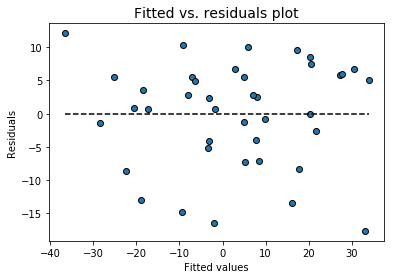

In [12]:
model.fitted_vs_residual()

### Fitted values vs. feature variables

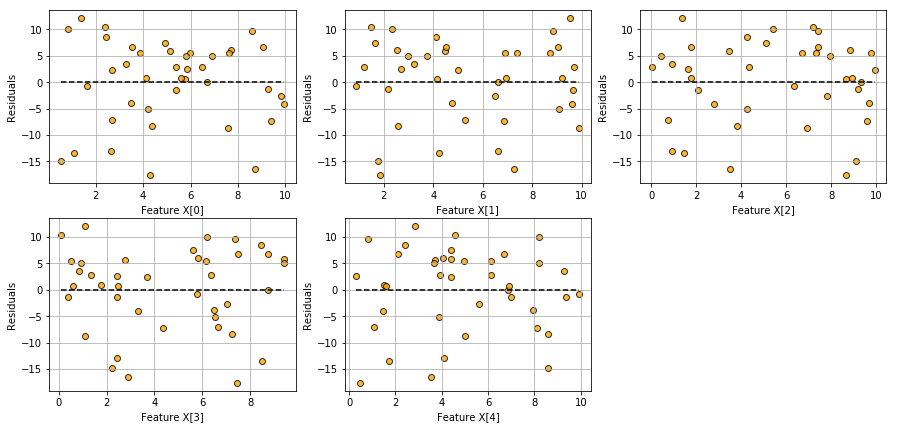

In [13]:
model.fitted_vs_features()

### Pairplot of the dataset

This may take a little time. Have patience...


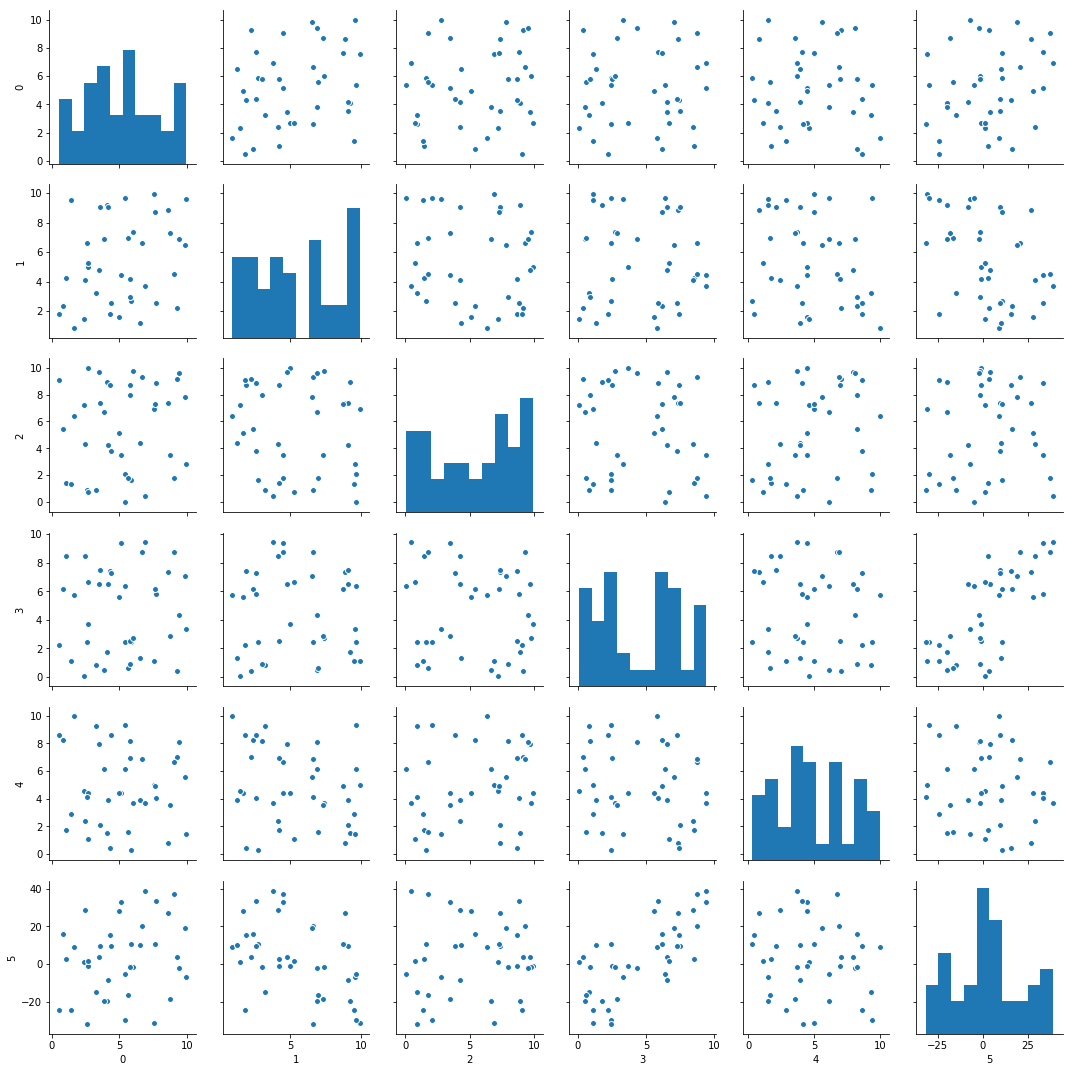

In [14]:
model.pairplot()

### Cook's distance plot

c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


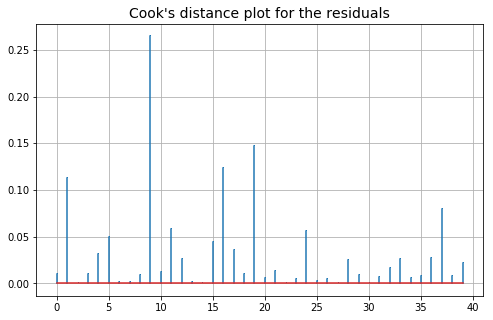

In [15]:
model.cook_distance()

### Influence plot

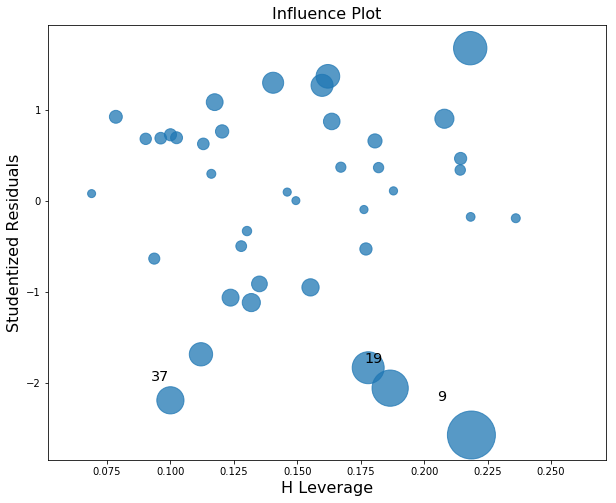

In [16]:
model.influence_plot()

### Variance inflation factors

In [17]:
model.vif()

Variance inflation factor for feature 0: 5.03
Variance inflation factor for feature 1: 3.84
Variance inflation factor for feature 2: 3.68
Variance inflation factor for feature 3: 2.73
Variance inflation factor for feature 4: 3.33


### Generate all diagnostics plots with `run_diagnostics`

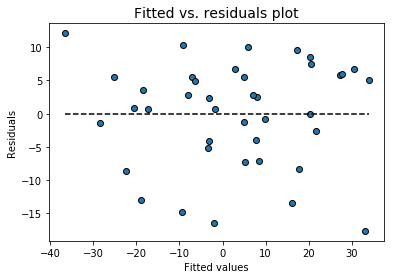

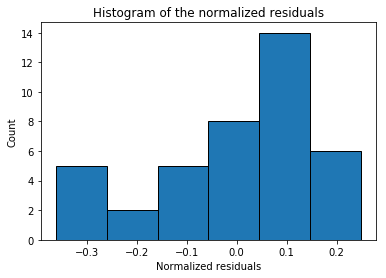

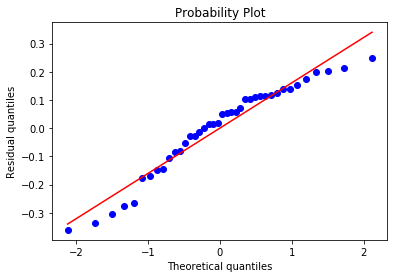


The residuals seem to have come from a Gaussian process


In [18]:
model.run_diagnostics()

### Test `predict` with new samples

In [21]:
num_samples=20
num_dim =5
X_test = 10*np.random.random(size=(num_samples,num_dim))

In [22]:
model.predict(X_test)

array([-30.1283978 , -17.94973418,  18.97708482, -15.17951234,
        -3.25066473, -11.90628862, -17.57582617,  12.81152568,
        -1.9615583 ,  25.67017197,   4.33227393, -23.45401895,
        20.68458566,  19.56289471, -10.43957454, -14.86038328,
        -7.86502117,  18.12864317,  -3.77303316,  13.47824212])

### Ingest data, fit model, and plot visual diagnostics in a loop
This is the big advantage of OOP. Once you have compact representation of your class, you can call methods and visualize for a lot of cases, on a continuous loop.

Here, we are increasing the noise level of the data, fitting model, and plotting the Q-Q plot.


Simulating a regression problem...


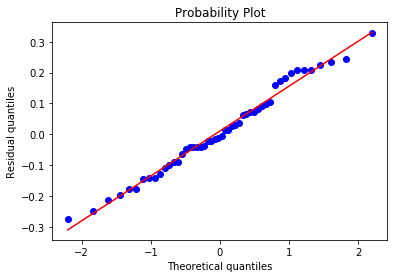


Simulating a regression problem...


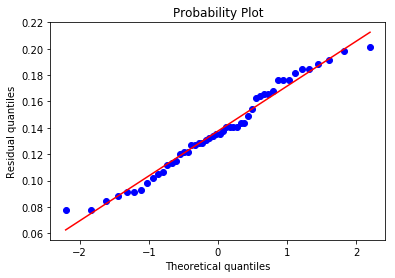


Simulating a regression problem...


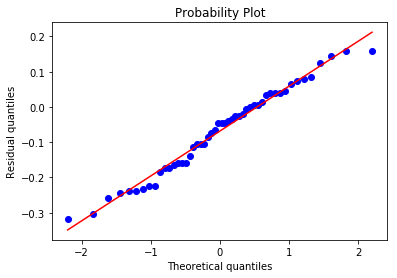


Simulating a regression problem...


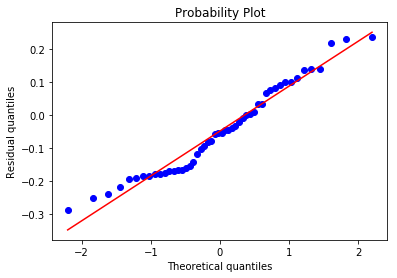

In [23]:
num_samples=50
num_dim = 15
X = np.random.random(size=(num_samples,num_dim))
coeff = np.random.randint(-10,10,num_dim)   
m = mlr()

for i in range(5,21,5):
    print(f"\nSimulating a regression problem...")
    y = np.dot(coeff,X.T)+i*np.random.normal(num_samples)
    m.ingest_data(X,y)
    m.fit()
    m.qqplot_resid()